C:\Users\wickr\AppData\Local\Temp\ipykernel_19008\1825767884.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i], z = signal.lfilter(b, a, [x], zi=z)


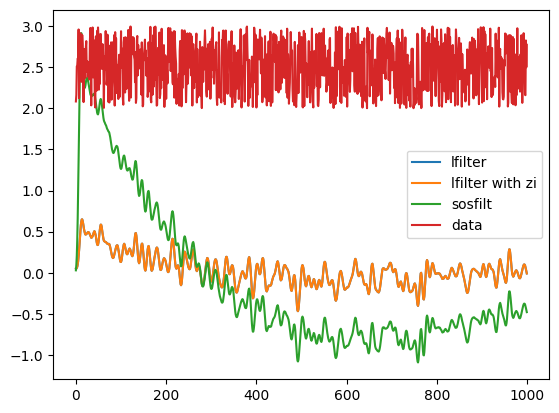

In [1]:
from scipy import signal
from numpy import random
import matplotlib.pyplot as plt
import numpy as np

def filter_sbs():
    data = random.random(1000)+2
    b, a = signal.cheby2(5, 40, [0.05,30], 'bandpass', fs=250)
    sos = signal.cheby2(5, 40, [0.05,30], 'bandpass', fs=250, output='sos')
    z = signal.lfilter_zi(b, a) * data[0]
    result = np.zeros(data.size)
    result2 = np.zeros(data.size)
    result3 = signal.sosfilt(sos, data)
    result2, _ = signal.lfilter(b, a, data, zi=z)
    for i, x in enumerate(data):
        result[i], z = signal.lfilter(b, a, [x], zi=z)
    return result, result2, result3, data

result, result2, result3, data = filter_sbs()
plt.plot(result, label='lfilter')
plt.plot(result2, label='lfilter with zi')
plt.plot(result3, label='sosfilt')
plt.plot(data, label='data')
plt.legend()


In [1]:
CHANNEL8 = ['T4-Cz','Fp2-Cz','C4-Cz','O2-Cz','O1-Cz','Fp1-Cz','C3-Cz','T3-Cz']
# CHANNEL8 = [1,2,3,4,5,6,7,8]
CHANNEL12 = ['Fp1-T3','T3-O1', 
            'Fp1-C3', 'C3-O1', 
            'Fp2-C4', 'C4-O2', 
            'Fp2-T4', 'T4-O2',
            'T3-C3', 'C3-Cz', 'Cz-C4', 'C4-T4']

In [8]:
for i in CHANNEL12:
    s = i.split('-')
    print(i, end=' ')
    for j,k in enumerate(CHANNEL8):
        if s[0] == k.split('-')[0]:
            print(j, end=' ')
    for j,k in enumerate(CHANNEL8):
        if s[1] == k.split('-')[0]:
            print(j, end=' ')
    else:
        print('')
            

Fp1-T3 5 7 
T3-O1 7 4 
Fp1-C3 5 6 
C3-O1 6 4 
Fp2-C4 1 2 
C4-O2 2 3 
Fp2-T4 1 0 
T4-O2 0 3 
T3-C3 7 6 
C3-Cz 6 
Cz-C4 2 
C4-T4 2 0 
